## 心理尺度を開発したい -探索的因子分析-

In [1]:
#データの読み込み, データフレームの確認
dkk <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_07/motivation.csv")
head(dkk)

I1,I2,I3,I4,E1,E2,E3,E4
4,3,2,3,3,2,1,2
2,3,2,2,3,3,3,2
4,3,4,3,1,2,1,2
3,4,3,3,2,1,2,3
2,3,3,2,3,3,3,3
3,3,3,3,3,3,3,1


### 7.2 因子数の決定

因子数を決定する方法は主に3つ.
- ガットマン基準
- スクリーテスト
- 平行分析

その他の方法は服部(2011)参照

#### 7.2.1 ガットマン基準
値が1以上の固有値の数を因子数とする方法

In [2]:
#固有値の算出

cor.dkk <- cor(dkk)    #相関行列の算出
eigen(cor.dkk)         #固有値の算出

eigen() decomposition
$values
[1] 3.7613999 1.4433708 0.7540046 0.5187218 0.4542219 0.4047593 0.3621858
[8] 0.3013360

$vectors
           [,1]       [,2]          [,3]        [,4]        [,5]        [,6]
[1,] -0.3926462 -0.2301045 -0.0333832323 -0.52515661  0.21253515  0.47751342
[2,] -0.3758623 -0.3098362  0.0632813112  0.39111687 -0.41525098  0.54121686
[3,] -0.3549102 -0.3939742  0.0003961333  0.45820004 -0.03410657 -0.46807064
[4,] -0.3558663 -0.3927385  0.0032942653 -0.44311775  0.09053310 -0.46167222
[5,]  0.3188909 -0.4580327  0.0494596404  0.29034109  0.73346427  0.19706645
[6,]  0.3739172 -0.3468658  0.3270319076 -0.26379599 -0.28764867  0.04845881
[7,]  0.3770578 -0.3626446  0.2867485036 -0.08510451 -0.33073321 -0.07112476
[8,]  0.2612974 -0.2827956 -0.8962417070 -0.06171277 -0.20721941  0.02432511
            [,7]          [,8]
[1,]  0.47636461  0.1259504495
[2,] -0.37363526 -0.0282789005
[3,]  0.52998734 -0.0879528720
[4,] -0.54901170  0.0003674799
[5,] -0.15786112 -0.0067

### 7.2.2 スクリーテスト
固有値を縦軸, 因子の番号を横軸にとって, こひゅうちの変化をプロットした折れ線グラフのことをスクリープロットという.  
固有値の水位がなだらかになる直線までの固有値の数を因子数とする.

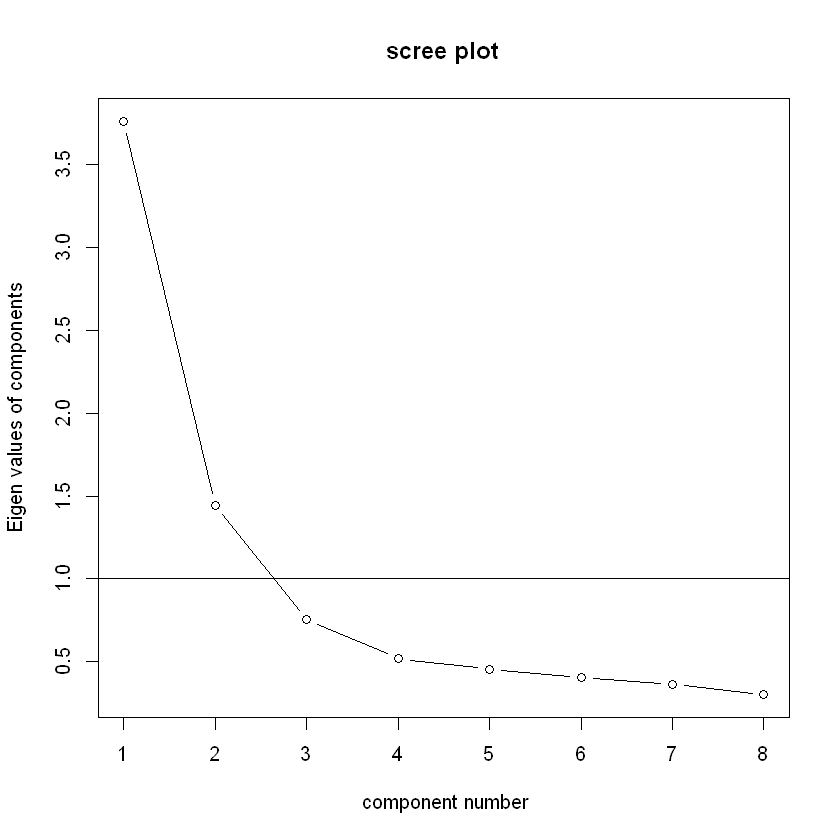

In [3]:
#スクリープロットの出力

library(psych)
VSS.scree(dkk)    #パッケージpsychのVSS.screeでスクリープロットの出力

### 7.2.3 平行分析
変数の数と標本サイズが実際のデータと同一の乱数データをn個作成して, n個の乱数データそれぞれで固有値を算出し, n個の固有値の平均を求める.  
平均した固有値よりも大きい実データの固有値の個数を因子数とする.

Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


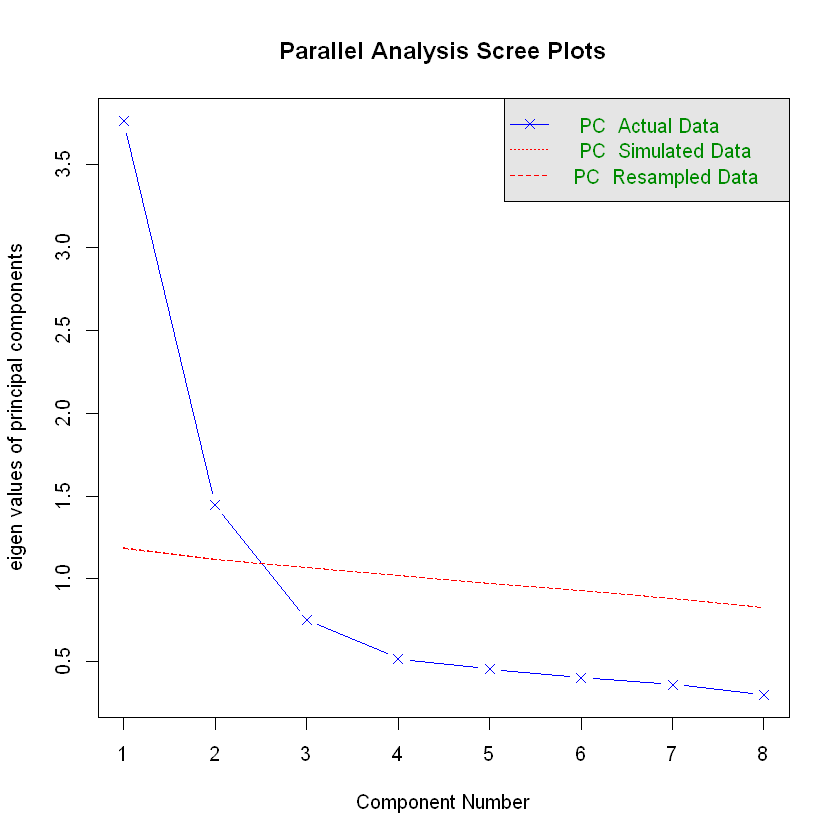

In [4]:
#平行分析
fa.parallel(dkk, fm="ml", fa="pc", n.iter=100)    #パッケージpsychのfa.parallelで実行(n.iterは発生させる乱数データの個数)

### 7.3 因子負荷の推定

In [5]:
#因子負荷の推定(初期解)

fa.dkk1 <- fa(dkk, nfactors=2, fm="ml", rotate="none")    #パッケージpsychのfaで母数の推定
print(fa.dkk1, sort=TRUE, digits=3)                       #結果の出力

Factor Analysis using method =  ml
Call: fa(r = dkk, nfactors = 2, rotate = "none", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
   item    ML1   ML2    h2    u2  com
E3    7 -0.743 0.394 0.707 0.293 1.52
E2    6 -0.727 0.362 0.660 0.340 1.47
I1    1  0.701 0.270 0.565 0.435 1.29
I2    2  0.664 0.352 0.564 0.436 1.52
I4    4  0.630 0.437 0.588 0.412 1.78
I3    3  0.630 0.425 0.577 0.423 1.75
E1    5 -0.580 0.378 0.479 0.521 1.72
E4    8 -0.426 0.144 0.202 0.798 1.22

                        ML1   ML2
SS loadings           3.324 1.018
Proportion Var        0.416 0.127
Cumulative Var        0.416 0.543
Proportion Explained  0.766 0.234
Cumulative Proportion 0.766 1.000

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  28  and the objective function was  3.156 with Chi Square of  1563.665
The degrees of freedom for the model are 13  and the objective function was  0.066 

Th

共通性の和と独自性の和は1になる.

In [6]:
#相関行列をもとにした因子負荷の推定(初期解)
fa.dkk.cor <- fa(cor.dkk, nfactors=2, fm="ml", rotate="none", n.obs=500)
print(fa.dkk.cor, sort=TRUE, digits=3)

Factor Analysis using method =  ml
Call: fa(r = cor.dkk, nfactors = 2, n.obs = 500, rotate = "none", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
   item    ML1   ML2    h2    u2  com
E3    7 -0.743 0.394 0.707 0.293 1.52
E2    6 -0.727 0.362 0.660 0.340 1.47
I1    1  0.701 0.270 0.565 0.435 1.29
I2    2  0.664 0.352 0.564 0.436 1.52
I4    4  0.630 0.437 0.588 0.412 1.78
I3    3  0.630 0.425 0.577 0.423 1.75
E1    5 -0.580 0.378 0.479 0.521 1.72
E4    8 -0.426 0.144 0.202 0.798 1.22

                        ML1   ML2
SS loadings           3.324 1.018
Proportion Var        0.416 0.127
Cumulative Var        0.416 0.543
Proportion Explained  0.766 0.234
Cumulative Proportion 0.766 1.000

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  28  and the objective function was  3.156 with Chi Square of  1563.665
The degrees of freedom for the model are 13  and the objective functio

### 7.4 因子軸の回転

In [7]:
#因子負荷の推定(プロマックス回転)

library(GPArotation)    #プロマックス回転をするためのパッケージGPArotationの読み込み
fa.dkk2 <- fa(dkk, nfactors=2, fm="ml", rotate="promax")
print(fa.dkk2, sort=TRUE, digits=3)

Factor Analysis using method =  ml
Call: fa(r = dkk, nfactors = 2, rotate = "promax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
   item    ML2    ML1    h2    u2  com
I4    4  0.803  0.073 0.588 0.412 1.02
I3    3  0.791  0.061 0.577 0.423 1.01
I2    2  0.732 -0.035 0.564 0.436 1.00
I1    1  0.666 -0.141 0.565 0.435 1.09
E3    7  0.013  0.848 0.707 0.293 1.00
E2    6 -0.011  0.806 0.660 0.340 1.00
E1    5  0.084  0.734 0.479 0.521 1.03
E4    8 -0.079  0.402 0.202 0.798 1.08

                        ML2   ML1
SS loadings           2.253 2.089
Proportion Var        0.282 0.261
Cumulative Var        0.282 0.543
Proportion Explained  0.519 0.481
Cumulative Proportion 0.519 1.000

 With factor correlations of 
      ML2   ML1
ML2  1.00 -0.54
ML1 -0.54  1.00

Mean item complexity =  1
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  28  and the objective function was  3.156 with Chi Square of  1563.665

**斜交回転を行った場合, 「因子寄与=(因子ごとの)因子負荷の2乗和」という関係は成り立たなくなる**

### 7.6 報告例

学習動機づけを測定するための8項目について, 探索的因子分析を行った. まず固有値を求めたところ, 3.761, 1.443, 0.574, 0.519, 0.454, $\ldots$であり, 値が1以上の固有値の数は2つであった. また, 固有値の減衰状況からは, 2因子解が妥当と考えられた. 次に平行分析を行ったところ, ここでも2因子解が示唆された.
以上の結果と, 動機付けは外発的動機付けと内発的動機付けの2つに分けられることが多いことから, 2因子解を探索的因子分析(最尤法・プロマックス回転)を行った. 推定結果を下表に示す.

第1因子は「好奇心が満たされるから」や「わかるようになるのがうれしいから」など4項目が高い因子負荷を示しており, 学習自体を目的としていると考えられる項目が集まったことから, 「内発的動機付け」因子と命名した. 第2因子は, 「みんなが勉強しているから」や「勉強することが規則のようなものだから」など4項目が高い因子負荷を示しており, 学習以外のことを目的に学習していることを表す項目が集まったことから, 「外発的動機付け」因子と命名した. また, 2つの因子の間の相関は-.540であり, 内発的動機付けが高い人ほど外発的動機付けは低い傾向にあった. 累積因子寄与率は54.3%であった.

### 7.7 信頼性の評価
因子分析における信頼性係数の推定値として, $\omega$係数と$\alpha$係数がある.  
$\omega$係数はより正確な信頼性の推定値になり, $\alpha$係数は過去の心理学研究でよく報告される係数である.

#### 7.7.1 $\alpha$係数 

In [8]:
#α係数の算出
#library(psych)

#内発的動機付けの因子の抽出
dkk.nht <- dkk[, c("I1", "I2", "I3", "I4")]
alpha(dkk.nht)    #パッケージpsychのalphaによる尺度のα係数の算出

#外発的動機付けの因子の算出
dkk.ght <- dkk[, c("E1", "E2", "E3", "E4")]
alpha(dkk.ght)


Reliability analysis   
Call: alpha(x = dkk.nht)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.84      0.84     0.8      0.57 5.2 0.012  2.5 0.62     0.56

 lower alpha upper     95% confidence boundaries
0.82 0.84 0.86 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se   var.r med.r
I1      0.80      0.80    0.73      0.57 4.0    0.015 0.00086  0.57
I2      0.79      0.80    0.73      0.57 3.9    0.016 0.00152  0.57
I3      0.79      0.80    0.72      0.57 3.9    0.016 0.00099  0.55
I4      0.79      0.79    0.72      0.56 3.8    0.016 0.00165  0.55

 Item statistics 
     n raw.r std.r r.cor r.drop mean   sd
I1 500  0.81  0.81  0.72   0.66  2.4 0.76
I2 500  0.83  0.82  0.73   0.67  2.5 0.78
I3 500  0.83  0.82  0.74   0.67  2.6 0.78
I4 500  0.82  0.83  0.75   0.68  2.6 0.70

Non missing response frequency for each item
      1    2    3    4 miss
I1 0.09 0.52 0.31 0.08    0
I2 0.08 0.49 0.33 0.10    0
I3 0.07 0.


Reliability analysis   
Call: alpha(x = dkk.ght)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.79      0.79    0.76      0.48 3.7 0.015  2.2 0.62     0.47

 lower alpha upper     95% confidence boundaries
0.76 0.79 0.82 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
E1      0.72      0.72    0.67      0.46 2.5    0.022 0.041  0.35
E2      0.70      0.70    0.62      0.44 2.3    0.023 0.013  0.39
E3      0.69      0.69    0.61      0.42 2.2    0.024 0.013  0.39
E4      0.82      0.82    0.76      0.60 4.6    0.014 0.006  0.57

 Item statistics 
     n raw.r std.r r.cor r.drop mean   sd
E1 500  0.81  0.80  0.70   0.63  2.1 0.82
E2 500  0.83  0.82  0.77   0.67  2.2 0.80
E3 500  0.84  0.84  0.79   0.69  2.2 0.80
E4 500  0.65  0.66  0.46   0.42  2.4 0.76

Non missing response frequency for each item
      1    2    3    4 miss
E1 0.25 0.43 0.28 0.04    0
E2 0.22 0.44 0.31 0.03    0
E3 0.21 0.45 0.30 0.

$\alpha$係数は下位尺度ごとに求めるのが一般的.  
```raw_alpha```の値が$\alpha$係数の値.  
**$\alpha$係数の最大値は1であり, 一般に0.8以上であれば信頼性が高いと判断される(尾崎・荘島, 2014など).**  
```Reliability if an item is dropped:```は, 当該変数を除外したときの$\alpha$係数の値が示されている.

#### 7.7.2 $\omega$係数

In [9]:
#ω係数の算出
#library(psych)

omega(dkk.nht, nfactors=1)
omega(dkk.ght, nfactors=1)

Omega_h for 1 factor is not meaningful, just omega_t
Warning message in schmid(m, nfactors, fm, digits, rotate = rotate, n.obs = n.obs, :
"Omega_h and Omega_asymptotic are not meaningful with one factor"Warning message in cov2cor(t(w) %*% r %*% w):
"diag(.) had 0 or NA entries; non-finite result is doubtful"

Omega 
Call: omega(m = dkk.nht, nfactors = 1)
Alpha:                 0.84 
G.6:                   0.8 
Omega Hierarchical:    0.84 
Omega H asymptotic:    1 
Omega Total            0.84 

Schmid Leiman Factor loadings greater than  0.2 
      g  F1*   h2   u2 p2
I1 0.74      0.54 0.46  1
I2 0.75      0.56 0.44  1
I3 0.76      0.57 0.43  1
I4 0.77      0.59 0.41  1

With eigenvalues of:
  g F1* 
2.3 0.0 

general/max  Inf   max/min =   NaN
mean percent general =  1    with sd =  0 and cv of  0 
Explained Common Variance of the general factor =  1 

The degrees of freedom are 2  and the fit is  0.02 
The number of observations was  500  with Chi Square =  12.25  with prob <  0.0022
The root mean square of the residuals is  0.03 
The df corrected root mean square of the residuals is  0.05
RMSEA index =  0.102  and the 10 % confidence intervals are  0.052 0.159
BIC =  -0.18

Compare this with the adequacy of just a general factor and no group factors
The degrees of freedom for just the gen

Omega_h for 1 factor is not meaningful, just omega_t
Warning message in schmid(m, nfactors, fm, digits, rotate = rotate, n.obs = n.obs, :
"Omega_h and Omega_asymptotic are not meaningful with one factor"Warning message in cov2cor(t(w) %*% r %*% w):
"diag(.) had 0 or NA entries; non-finite result is doubtful"

Omega 
Call: omega(m = dkk.ght, nfactors = 1)
Alpha:                 0.79 
G.6:                   0.76 
Omega Hierarchical:    0.8 
Omega H asymptotic:    1 
Omega Total            0.8 

Schmid Leiman Factor loadings greater than  0.2 
      g  F1*   h2   u2 p2
E1 0.71      0.50 0.50  1
E2 0.80      0.64 0.36  1
E3 0.83      0.69 0.31  1
E4 0.46      0.21 0.79  1

With eigenvalues of:
  g F1* 
  2   0 

general/max  Inf   max/min =   NaN
mean percent general =  1    with sd =  0 and cv of  0 
Explained Common Variance of the general factor =  1 

The degrees of freedom are 2  and the fit is  0.03 
The number of observations was  500  with Chi Square =  13.35  with prob <  0.0013
The root mean square of the residuals is  0.04 
The df corrected root mean square of the residuals is  0.06
RMSEA index =  0.107  and the 10 % confidence intervals are  0.057 0.164
BIC =  0.92

Compare this with the adequacy of just a general factor and no group factors
The degrees of freedom for just the gener

岡田(2011)のシミュレーションでは, $\alpha$係数や他の$\omega$係数と比較して, 群因子数を1としたときの$\omega_t$(omega total)のバイアスが小さいことが示されており, ```Omega Total```の値を$\omega$係数として参照している.

### 7.8 順序カテゴリカル変数の探索的因子分析と信頼性の評価

#### 7.8.1 データ概要(中学生300人の数学テストデータを例に)
- 対象: 中学生300人
- 項目: 数学のテストの10問の回答があり, 「0 = 誤答」「1 = 正答」でコーディング

In [10]:
#データの読み込み

math <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_07/math_test.csv")
head(math)

math1,math2,math3,math4,math5,math6,math7,math8,math9,math10
1,0,1,1,1,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1
1,1,0,1,1,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1
0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,1,1,0


#### 7.8.2 順序カテゴリカル変数を扱った探索的因子分析
プロセスは通常の探索的因子分析と同様であるが, 変数の種類によって相関係数の算出の仕方が異なる(ポリコリック相関係数など).

eigen() decomposition
$values
 [1] 6.72455979 1.03182662 0.52212413 0.47629035 0.40562141 0.28848683
 [7] 0.22278639 0.14818743 0.11671273 0.06340432

$vectors
            [,1]       [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] -0.2957072 -0.3276082  0.22516311 -0.57435053  0.18074382 -0.58673421
 [2,] -0.3029994 -0.4054682  0.37147988  0.11804433  0.12374073  0.40684071
 [3,] -0.3183958 -0.2426510 -0.05563147 -0.38615432 -0.37148343  0.48857678
 [4,] -0.2958988 -0.3520125 -0.06092584  0.55783224  0.46544593 -0.03302337
 [5,] -0.3080954 -0.2754694 -0.40498742  0.23015763 -0.54034390 -0.29954891
 [6,] -0.2961184  0.2324548 -0.57268458 -0.32658208  0.49257458  0.25510241
 [7,] -0.3496602  0.2063621 -0.15434307  0.12565919 -0.17943911  0.02310166
 [8,] -0.3318567  0.4000756  0.18248272  0.09825377 -0.14891956  0.01973490
 [9,] -0.3119933  0.3584781  0.50399003  0.01871979 -0.02571018  0.03872937
[10,] -0.3456541  0.2905257 -0.03724707  0.10233370  0.08799072 -0.30528001
    

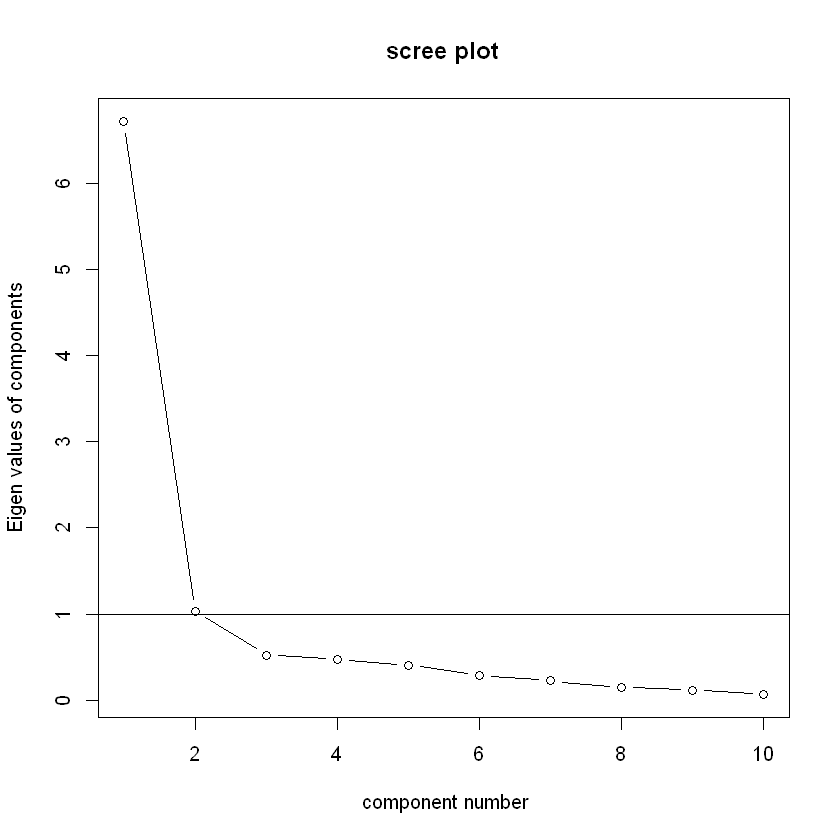

Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


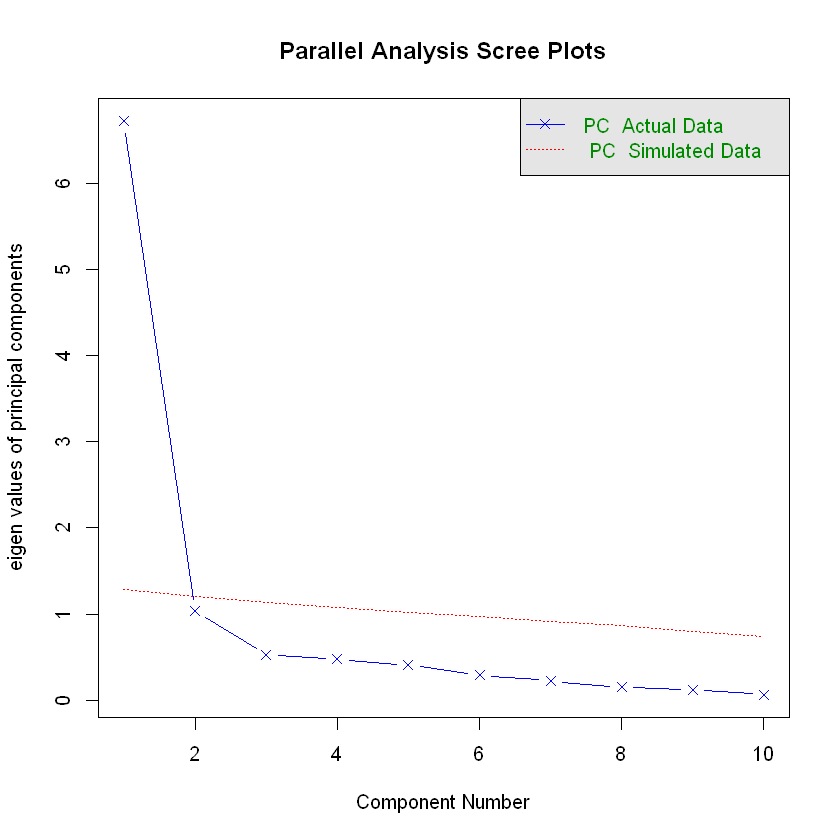

In [11]:
#因子数の決定
#library(psych)    ポリコリック相関係数を求めるpolychoricを用いるのに必要

cor.math <- polychoric(math)$rho    #$rhoを付与することで三角行列ではなく対称行列でオブジェクトを保存することが出来る
eigen(cor.math)                     #固有値の算出(ガットマン基準)
VSS.scree(cor.math)                 #スクリープロットの出力
fa.parallel(cor.math, fm="ml", fa="pc", n.iter=100, n.obs=300)    #平行分析

In [12]:
#因子負荷の推定(データが全て順序カテゴリカル変数の場合)

fa.math <- fa.poly(math, nfactors=1, fm="ml")
print(fa.math, sort=TRUE, digits=3)


Factor Analysis using method =  ml
Call: fa.poly(x = math, nfactors = 1, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
        V   ML1    h2    u2 com
math10 10 0.923 0.852 0.148   1
math7   7 0.921 0.849 0.151   1
math8   8 0.904 0.817 0.183   1
math9   9 0.831 0.690 0.310   1
math6   6 0.758 0.574 0.426   1
math3   3 0.746 0.556 0.444   1
math5   5 0.735 0.540 0.460   1
math2   2 0.689 0.474 0.526   1
math4   4 0.683 0.467 0.533   1
math1   1 0.675 0.455 0.545   1

                 ML1
SS loadings    6.275
Proportion Var 0.627

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  45  and the objective function was  9.917 with Chi Square of  2923.863
The degrees of freedom for the model are 35  and the objective function was  2.161 

The root mean square of the residuals (RMSR) is  0.096 
The df corrected root mean square of the residuals is  0.109 

The harmonic number of obser

#### 7.8.3 信頼性の評価
順序カテゴリカル変数について$\alpha$係数や$\omega$係数の算出するためには, 引数にポリコリック相関行列を指定する.

In [13]:
#α係数とω係数の算出
#library(psych)

alpha(cor.math, n.obs=300)
omega(cor.math, nfactors=1, n.obs=300)


Reliability analysis   
Call: alpha(x = cor.math, n.obs = 300)

  raw_alpha std.alpha G6(smc) average_r S/N    ase median_r
      0.95      0.95    0.96      0.63  17 0.0048     0.61

 lower alpha upper     95% confidence boundaries
0.94 0.95 0.95 

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
math1       0.94      0.94    0.96      0.64  16   0.0051 0.0128  0.62
math2       0.94      0.94    0.95      0.64  16   0.0052 0.0123  0.61
math3       0.94      0.94    0.96      0.63  15   0.0054 0.0136  0.60
math4       0.94      0.94    0.96      0.64  16   0.0051 0.0123  0.61
math5       0.94      0.94    0.96      0.64  16   0.0053 0.0125  0.60
math6       0.94      0.94    0.96      0.65  16   0.0051 0.0114  0.62
math7       0.93      0.93    0.95      0.61  14   0.0058 0.0103  0.59
math8       0.94      0.94    0.95      0.63  15   0.0055 0.0086  0.61
math9       0.94      0.94    0.96      0.64  16   0.0053 0.0099  0.62
mat

Omega_h for 1 factor is not meaningful, just omega_t
Warning message in schmid(m, nfactors, fm, digits, rotate = rotate, n.obs = n.obs, :
"Omega_h and Omega_asymptotic are not meaningful with one factor"Warning message in cov2cor(t(w) %*% r %*% w):
"diag(.) had 0 or NA entries; non-finite result is doubtful"

Omega 
Call: omega(m = cor.math, nfactors = 1, n.obs = 300)
Alpha:                 0.95 
G.6:                   0.96 
Omega Hierarchical:    0.95 
Omega H asymptotic:    1 
Omega Total            0.95 

Schmid Leiman Factor loadings greater than  0.2 
          g  F1*   h2   u2 p2
math1  0.73      0.54 0.46  1
math2  0.75      0.57 0.43  1
math3  0.80      0.64 0.36  1
math4  0.73      0.54 0.46  1
math5  0.77      0.59 0.41  1
math6  0.74      0.54 0.46  1
math7  0.91      0.82 0.18  1
math8  0.85      0.72 0.28  1
math9  0.78      0.62 0.38  1
math10 0.89      0.80 0.20  1

With eigenvalues of:
  g F1* 
6.4 0.0 

general/max  Inf   max/min =   NaN
mean percent general =  1    with sd =  0 and cv of  0 
Explained Common Variance of the general factor =  1 

The degrees of freedom are 35  and the fit is  2.28 
The number of observations was  300  with Chi Square =  670.7  with prob <  1.3e-118
The root mean square of the residuals is  0.08 
The df corrected root mean square of the resi